In [4]:
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
# Constants
C_m = 1.0  # Membrane capacitance (uF/cm^2)
g_Na = 120.0  # Sodium conductance (mS/cm^2)
g_K = 36.0  # Potassium conductance (mS/cm^2)
g_L = 0.3  # Leak conductance (mS/cm^2)
E_Na = 50.0  # Sodium reversal potential (mV)
E_K = -77.0  # Potassium reversal potential (mV)
E_L = -54.387  # Leak reversal potential (mV)
V_threshold = -40.0  # Threshold potential for action potential initiation (mV)

In [6]:
# Time parameters
dt = 0.01  # Time step (ms)
t_max = 50  # Maximum simulation time (ms)
t = np.arange(0, t_max, dt)

In [7]:
# Initial conditions
V_m = -65.0  # Initial membrane potential (mV)
m = 0.05  # Initial activation variable for sodium channels
h = 0.6  # Initial inactivation variable for sodium channels
n = 0.32  # Initial activation variable for potassium channels

In [14]:
# External current parameters
I_inj_start = 5.0  # Start of current injection (ms)
I_inj_end = 10.0  # End of current injection (ms)
I_amplitude = 5.0  # Amplitude of injected current (uA/cm^2)

In [15]:
# Lists to store results
V_m_values = []
m_values = []
h_values = []
n_values = []

# Action potential detection
action_potential_times = []

# Simulation loop
for time in t:
    # Inject current during the specified time window
    I_inj = 0.0
    if I_inj_start <= time <= I_inj_end:
        I_inj = I_amplitude

    # Hodgkin-Huxley equations with external current
    alpha_m = 0.1 * (V_m + 40) / (1 - np.exp(-(V_m + 40) / 10))
    beta_m = 4.0 * np.exp(-(V_m + 65) / 18)
    alpha_h = 0.07 * np.exp(-(V_m + 65) / 20)
    beta_h = 1.0 / (1 + np.exp(-(V_m + 35) / 10))
    alpha_n = 0.01 * (V_m + 55) / (1 - np.exp(-(V_m + 55) / 10))
    beta_n = 0.125 * np.exp(-(V_m + 65) / 80)

    m += dt * (alpha_m * (1 - m) - beta_m * m)
    h += dt * (alpha_h * (1 - h) - beta_h * h)
    n += dt * (alpha_n * (1 - n) - beta_n * n)

    I_Na = g_Na * m**3 * h * (V_m - E_Na)
    I_K = g_K * n**4 * (V_m - E_K)
    I_L = g_L * (V_m - E_L)

    dV_m = ((-(I_Na + I_K + I_L) + I_inj) / C_m) * dt
    V_m += dV_m

    # Store values for plotting
    V_m_values.append(V_m)
    m_values.append(m)
    h_values.append(h)
    n_values.append(n)

    # Detect action potential initiation
    if V_m >= V_threshold and len(action_potential_times) == 0:
        action_potential_times.append(time)

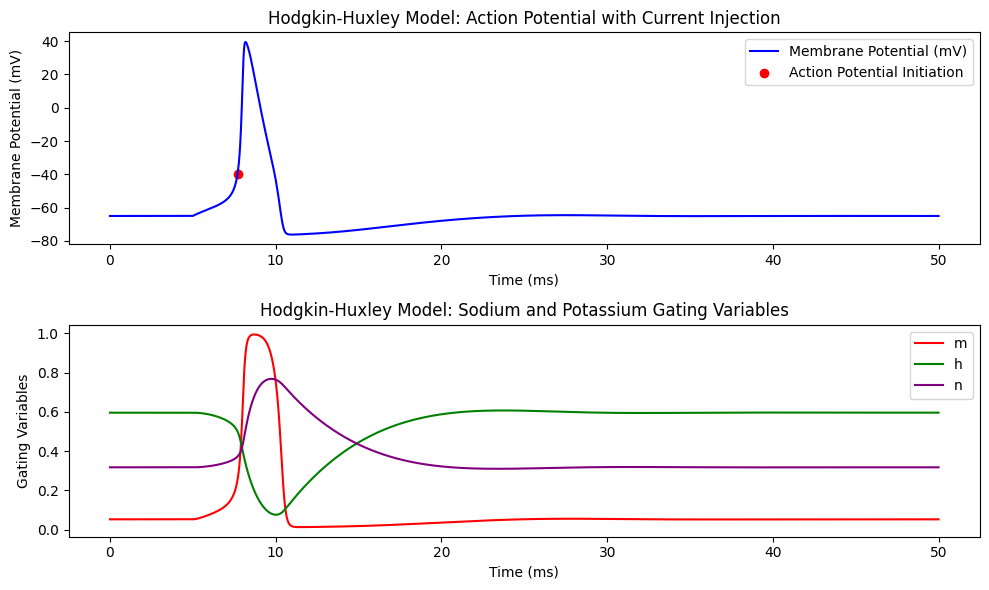

In [16]:
# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, V_m_values, label='Membrane Potential (mV)', color='blue')
plt.scatter(action_potential_times, [V_threshold] * len(action_potential_times),
            color='red', marker='o', label='Action Potential Initiation')
plt.title('Hodgkin-Huxley Model: Action Potential with Current Injection')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, m_values, label='m', color='red')
plt.plot(t, h_values, label='h', color='green')
plt.plot(t, n_values, label='n', color='purple')
plt.title('Hodgkin-Huxley Model: Sodium and Potassium Gating Variables')
plt.xlabel('Time (ms)')
plt.ylabel('Gating Variables')
plt.legend()

plt.tight_layout()
plt.show()